In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### filter

In [7]:
adata = sc.read_h5ad('/stanley/WangLab/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/adata/2022-09-29-Rena-HeLa16Gene-preflt.h5ad')
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,696855,89,4950,24,15,2.772589,403.0,6.001415
1,1,1,538053,83,7029,23,15,2.772589,262.0,5.572154
2,2,1,715678,117,2820,22,14,2.708050,278.0,5.631212
3,3,1,1313749,186,3765,23,15,2.772589,581.0,6.366470
4,4,1,561750,170,1387,26,15,2.772589,253.0,5.537334
...,...,...,...,...,...,...,...,...,...,...
3671,507,7,562496,13034,2515,17,16,2.833213,411.0,6.021023
3672,508,7,613527,13057,6526,16,16,2.833213,722.0,6.583409
3673,509,7,588370,13041,7724,16,15,2.772589,586.0,6.375025
3674,510,7,597927,13050,5507,16,14,2.708050,393.0,5.976351


In [8]:
sample_list = list(range(1,8))

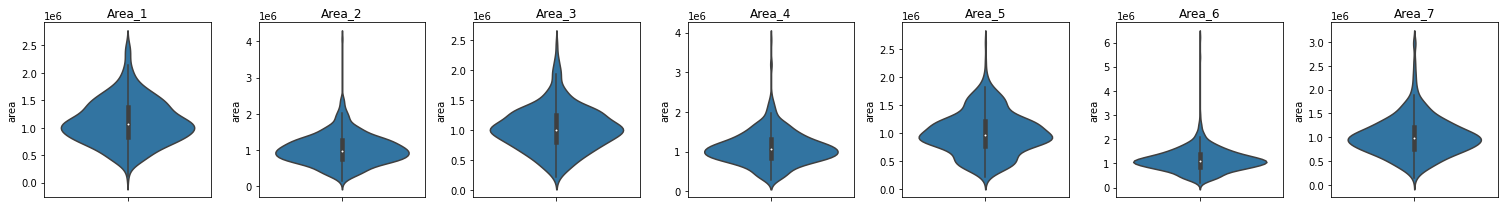

In [17]:
# cell volume
fig, ax = plt.subplots(1, len(sample_list), figsize=(3*len(sample_list), 3))
for i, sample in enumerate(sample_list):
    obs = adata.obs[adata.obs['sample']==sample]
    sns.violinplot(data=obs, y='area', ax=ax[i]).set_title(f'Area_{sample}')
plt.tight_layout()

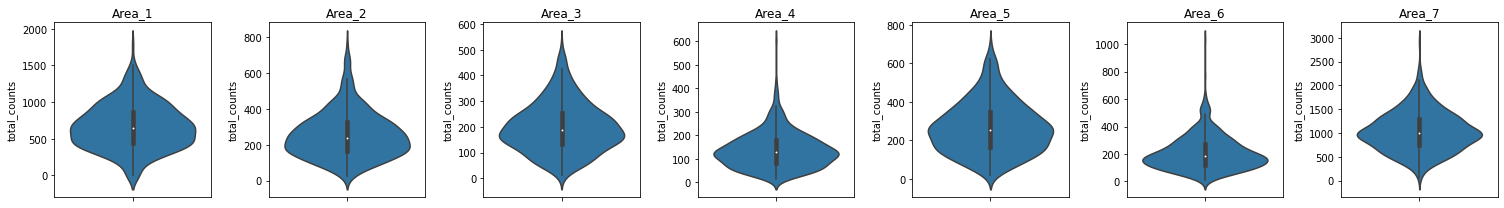

In [18]:
# total counts
fig, ax = plt.subplots(1, len(sample_list), figsize=(3*len(sample_list), 3))
for i, sample in enumerate(sample_list):
    obs = adata.obs[adata.obs['sample']==sample]
    sns.violinplot(data=obs, y='total_counts', ax=ax[i]).set_title(f'Area_{sample}')
plt.tight_layout()

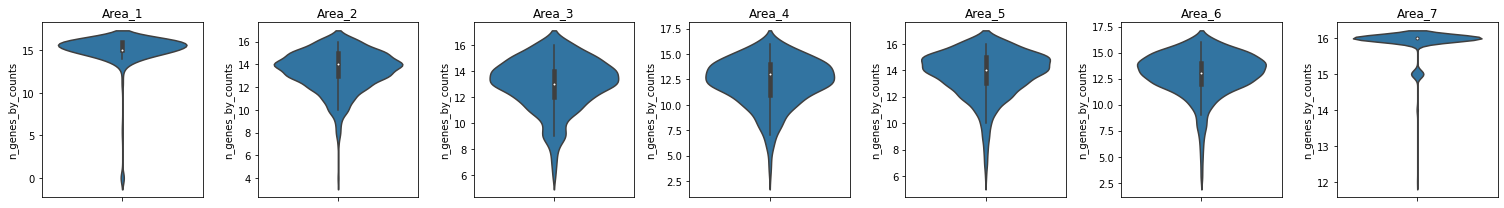

In [19]:
# n_genes per cell
fig, ax = plt.subplots(1, len(sample_list), figsize=(3*len(sample_list), 3))
for i, sample in enumerate(sample_list):
    obs = adata.obs[adata.obs['sample']==sample]
    sns.violinplot(data=obs, y='n_genes_by_counts', ax=ax[i]).set_title(f'Area_{sample}')
plt.tight_layout()

In [20]:
# filtering -- TODO tune
sc.pp.filter_cells(adata, min_genes=1)
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,n_genes
0,0,1,696855,89,4950,24,15,2.772589,403.0,6.001415,15
1,1,1,538053,83,7029,23,15,2.772589,262.0,5.572154,15
2,2,1,715678,117,2820,22,14,2.708050,278.0,5.631212,14
3,3,1,1313749,186,3765,23,15,2.772589,581.0,6.366470,15
4,4,1,561750,170,1387,26,15,2.772589,253.0,5.537334,15
...,...,...,...,...,...,...,...,...,...,...,...
3671,507,7,562496,13034,2515,17,16,2.833213,411.0,6.021023,16
3672,508,7,613527,13057,6526,16,16,2.833213,722.0,6.583409,16
3673,509,7,588370,13041,7724,16,15,2.772589,586.0,6.375025,15
3674,510,7,597927,13050,5507,16,14,2.708050,393.0,5.976351,14


### detection efficiency

In [35]:
# normalize to GADPH counts
X_gadph_normalized = adata.X / (np.reshape(adata.X[:,15], (adata.X.shape[0],1)))
X_gadph_normalized.shape

/local/scratch/36418408.1.interactive/ipykernel_264921/275161950.py:2: RuntimeWarning: divide by zero encountered in true_divide
  X_gadph_normalized = adata.X / (np.reshape(adata.X[:,15], (adata.X.shape[0],1)))
/local/scratch/36418408.1.interactive/ipykernel_264921/275161950.py:2: RuntimeWarning: invalid value encountered in true_divide
  X_gadph_normalized = adata.X / (np.reshape(adata.X[:,15], (adata.X.shape[0],1)))


(3670, 16)

In [36]:
avg_20h = np.mean(X_gadph_normalized[adata.obs['sample']==1], axis=0)
avg_star = np.mean(X_gadph_normalized[adata.obs['sample']==7], axis=0)
detec_effi = avg_20h / avg_star

In [45]:
df_detec = pd.DataFrame(zip(adata.var.index, detec_effi), columns=['gene', 'detection efficiency'])
df_detec

,gene,detection efficiency
0,EEF2,0.117449
1,TFRC,0.566281
2,NEAT1,0.459626
3,TOP2A,0.576599
4,DAG1,0.685924
5,MKI67,0.174909
6,TMEM43,0.484557
7,TTYH3,0.180614
8,BIRC5,0.591299
9,PCNA,0.403808


<AxesSubplot:xlabel='detection efficiency', ylabel='gene'>

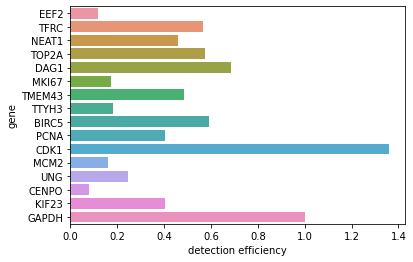

In [50]:
sns.barplot(data=df_detec, y='gene', x='detection efficiency')

### labeling efficiency

In [41]:
avg_1h = np.mean(X_gadph_normalized[adata.obs['sample']==6], axis=0)
label_effi = avg_1h / avg_20h

In [46]:
df_label = pd.DataFrame(zip(adata.var.index, avg_1h / avg_20h), columns=['gene', 'labeling efficiency'])
df_label

,gene,labeling efficiency
0,EEF2,0.432017
1,TFRC,0.712460
2,NEAT1,1.708707
3,TOP2A,2.501719
4,DAG1,0.772980
5,MKI67,0.705677
6,TMEM43,0.930033
7,TTYH3,0.997184
8,BIRC5,0.510886
9,PCNA,0.631803


<AxesSubplot:xlabel='labeling efficiency', ylabel='gene'>

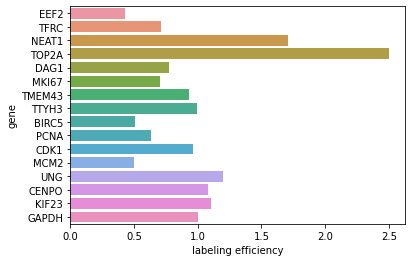

In [49]:
sns.barplot(data=df_label, y='gene', x='labeling efficiency')